# Sales Prediction

### Prédiction sur le nombre de vente d'un produit


Ce dataset contient les informations concernant les ventes d'un produit. Le dataset met en avant le coût en publicité du produit sur différents canaux (Télévision, Radio et Journaux) par rapport aux gains des ventes engendrées.

##### Import des librairies nécessaires et des données

In [57]:
# Exploration
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Préparation données
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Modèles ML
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Métriques
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
dataset = pd.read_csv('./data/sales.csv',sep=',')

In [3]:
dataset.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

### I) Exploration

Il est possible d'observer très rapidement les informations suivantes :

- Les différentes colonnes de nos données sont des valeurs numériques (pas de texte)
- Les données possèdent 200 lignes et 4 colonnes (TV, Radio, Newspaper et Sales)
- Nos données ne possèdent pas de valeur vide ou nulle
- Le montant pour la publicité à la télévision est beaucoup plus élèvé que sur les deux autres canaux (radio et journal)

Les données de notre "dataset" sont déjà propre, sans valeur vide ou nulle... 
Le seul traitement qui sera intéressant à mettre en place est la normalisation des valeurs. En effet, le prix dépensé dans la publicité "TV" est bien plus grand que la publicité sur les autres canaux de communication, donc il peut être intéressant d'adapter l'échelle pour un meilleur apprentissage du modèle.
Par exemple le maximum dépensé dans la publicité TV est 296.4 alors que dans la Radio le max est 49.6

In [6]:
def details_columns(data):
    for colonne in data.columns:
        print(f"Min {colonne} :",str(np.min(data[colonne])))
        print(f"Moyenne {colonne} :",str(np.mean(data[colonne])))
        print(f"Max {colonne} :",str(np.max(data[colonne])))
        print("---------------------------")
        

In [7]:
details_columns(dataset)

Min TV : 0.7
Moyenne TV : 147.0425
Max TV : 296.4
---------------------------
Min Radio : 0.0
Moyenne Radio : 23.264000000000006
Max Radio : 49.6
---------------------------
Min Newspaper : 0.3
Moyenne Newspaper : 30.553999999999995
Max Newspaper : 114.0
---------------------------
Min Sales : 1.6
Moyenne Sales : 15.130500000000001
Max Sales : 27.0
---------------------------


In [8]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [9]:
dataset.shape

(200, 4)

La correlation que nous pouvons observer entre la colonne "TV" et la colonne target "Sales" est forte

In [10]:
dataset.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [11]:
dataset.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [12]:
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [13]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


#### Analyse de la corrélation entre le nombre de vente et le prix en publicité TV

array([<AxesSubplot: xlabel='Sales', ylabel='TV'>], dtype=object)

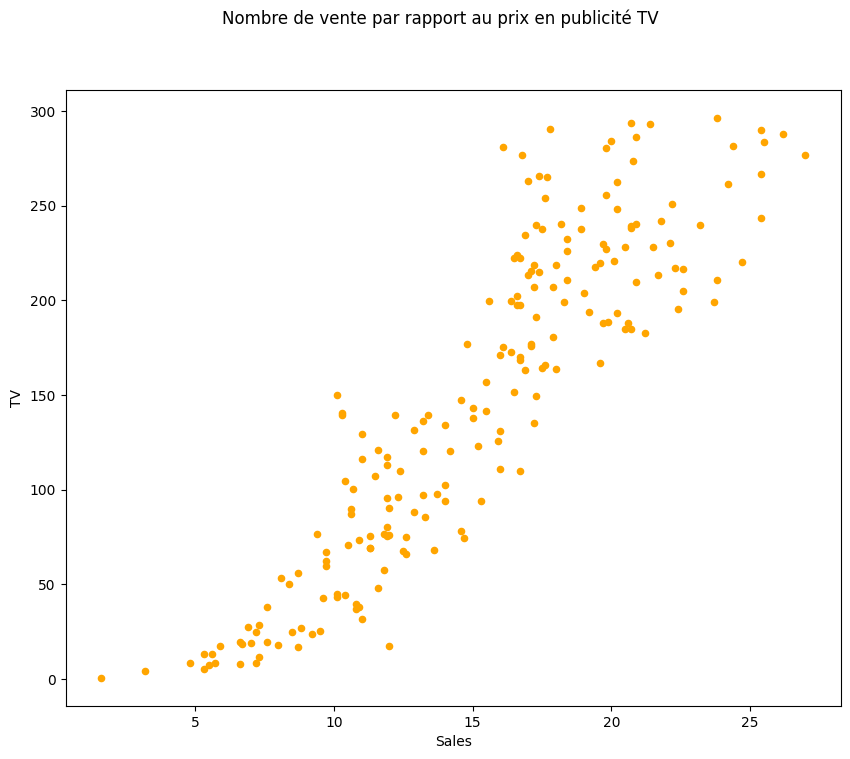

In [15]:
dataset.plot(x='Sales',y='TV',kind='scatter',figsize=(10,8),subplots=True,c='orange',title='Nombre de vente par rapport au prix en publicité TV')

Il peut être intéressant de généraliser cette approche à toutes les "features" de notre dataset en affichant le nombre de vente par rapport au prix dépensé dans la publicité "TV", "Radio" et "Newspaper"

Seulement le coût dans la publicité "TV" semble avoir une corrélation linéaire avec le nombre de vente engendré

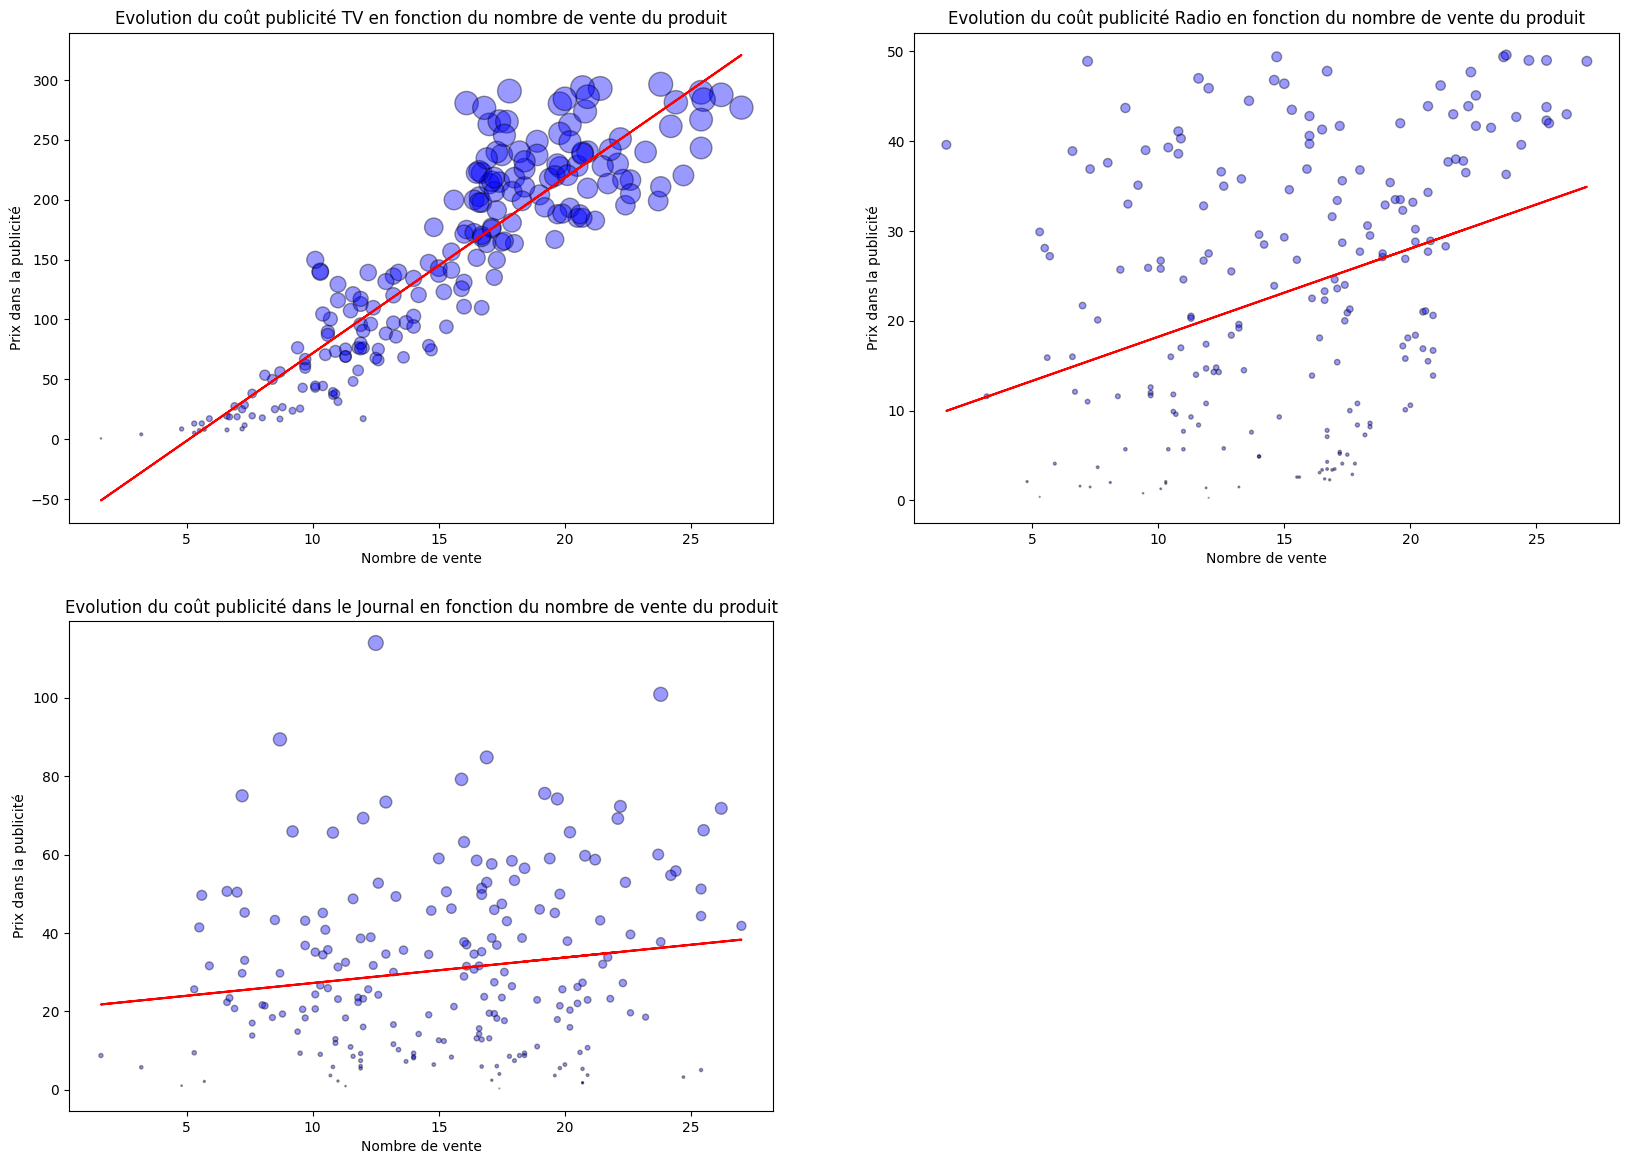

In [16]:
plt.figure(figsize=(20,14))
plt.subplot(2,2,1)
poly = np.polyfit(dataset['Sales'].values,dataset['TV'].values,1)
poly1d = np.poly1d(poly)
plt.scatter(dataset['Sales'].values,dataset['TV'].values,s=dataset['TV'].values, c='blue', alpha=0.4, edgecolors='black')
plt.plot(dataset['Sales'].values,poly1d(dataset['Sales'].values), color='red')
plt.xlabel('Nombre de vente')
plt.ylabel('Prix dans la publicité')
plt.title('''Evolution du coût publicité TV en fonction du nombre de vente du produit''')
plt.subplot(2,2,2)
poly = np.polyfit(dataset['Sales'].values,dataset['Radio'].values,1)
poly1d = np.poly1d(poly)
plt.scatter(dataset['Sales'].values,dataset['Radio'].values,s=dataset['Radio'].values, c='blue', alpha=0.4, edgecolors='black')
plt.plot(dataset['Sales'].values,poly1d(dataset['Sales'].values), color='red')
plt.xlabel('Nombre de vente')
plt.ylabel('Prix dans la publicité')
plt.title('''Evolution du coût publicité Radio en fonction du nombre de vente du produit''')
plt.subplot(2,2,3)
poly = np.polyfit(dataset['Sales'].values,dataset['Newspaper'].values,1)
poly1d = np.poly1d(poly)
plt.scatter(dataset['Sales'].values,dataset['Newspaper'].values,s=dataset['Newspaper'].values, c='blue', alpha=0.4, edgecolors='black')
plt.plot(dataset['Sales'].values,poly1d(dataset['Sales'].values), color='red')
plt.xlabel('Nombre de vente')
plt.ylabel('Prix dans la publicité')
plt.title('''Evolution du coût publicité dans le Journal en fonction du nombre de vente du produit''')
plt.show()

### 2) Modélisation

In [17]:
dataset = pd.read_csv('./data/sales.csv',sep=',')

In [18]:
target = dataset['Sales']
features = dataset.drop(columns='Sales')

In [19]:
standard_scaler = StandardScaler()
features_prepared = standard_scaler.fit_transform(features)
features_prepared = pd.DataFrame(features_prepared,columns=features.columns)

In [20]:
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=26)
random_for = RandomForestRegressor(random_state=26)
svr_regre = SVR()

In [90]:
def evaluation(model,X,y,kfold):
    '''
    Fonction permettant de :
    - Calculer le RMSE et MAPE pour un model,X,Y et kfold donné.
    - Tracer une courbe d'apprentissage (learning curve) avec comme score le "RMSE"
    '''
    scores_rmse = cross_val_score(model,X,y,cv=kfold,scoring='neg_root_mean_squared_error')
    scores_mape = cross_val_score(model,X,y,cv=kfold,scoring='neg_mean_absolute_percentage_error')
    print("RMSE moyen obtenu : " + str(np.mean(-scores_rmse)))
    print("MAPE moyen obtenu : " + str(np.mean(-scores_mape*100)) + "%")
    
    train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=features_prepared,
    y=target,
    cv=kfold,
    scoring="neg_root_mean_squared_error"
    )

    train_mean = -train_scores.mean(axis=1)
    test_mean = -test_scores.mean(axis=1)

    plt.subplots(figsize=(10,8))
    plt.plot(train_sizes, train_mean, label="train")
    plt.plot(train_sizes, test_mean, label="validation")

    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("RMSE")
    plt.legend(loc="best")

    plt.show()

#### Aide à la compréhension des résultats

Il est intéressant d'afficher le min, moyenne, max, médiane de notre valeur "cible", c'est à dire la colonne "Sales", puisque nos métriques seront à l'échelle de grandeur de ces valeurs.
Je vais m'appuyer sur les métriques de RMSE (Root Mean Squared Error) qui est la racine carré des erreurs au carré (différence entre les "Y_vrai" et les "Y_prédit")
et sur la MAPE (Mean Absolute Percentage Error) qui est l'erreur absolue (différence en valeur absolue entre les "Y_vrai" et les "Y_prédit") mis en pourcentage pour être plus simple à interpréter

In [29]:
print("Moyenne : " + str(np.mean(target.values)))
print("Médiane : " + str(np.median(target.values)))
print("Min : " + str(np.min(target.values)))
print("Max : " + str(np.max(target.values)))

Moyenne : 15.130500000000001
Médiane : 16.0
Min : 1.6
Max : 27.0


In [21]:
kfold = KFold(n_splits=5,shuffle=True)

#### Régression Linéaire

RMSE moyen obtenu : 1.6741850843976287
MAPE moyen obtenu : 11.505211754521799%


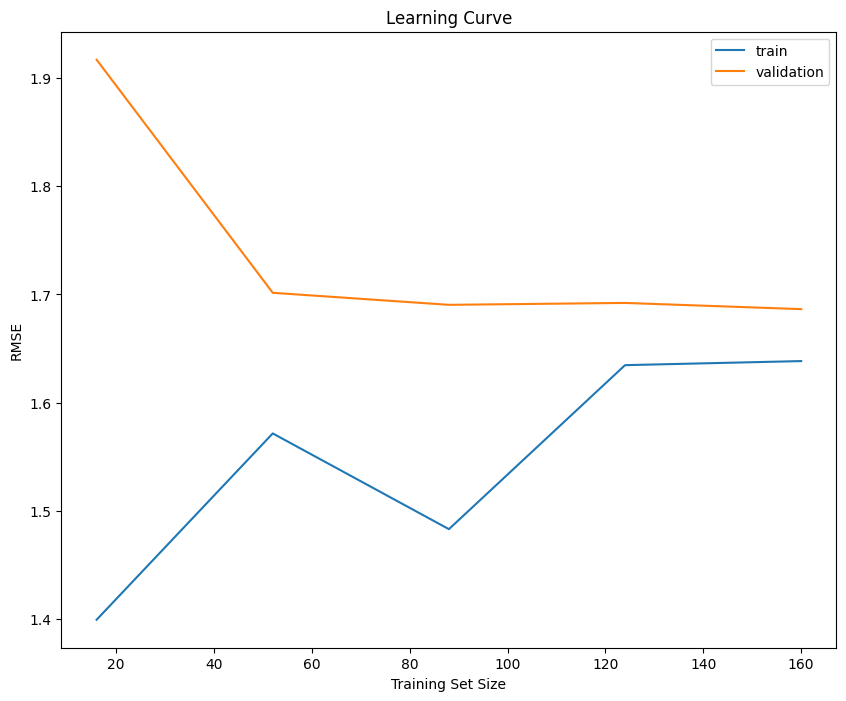

In [91]:
evaluation(linear_reg,features_prepared,target,kfold)

#### Arbre de décision (Decision Tree)

Il semblerait que l'arbre de décision ne soit pas le bon modèle à choisir. Au vu de la learning curve, on observe que la courbe d'apprentissage du jeu d'entrainement est complétement "plate", indiquant un très gros problème d'apprentissage du modèle.

RMSE moyen obtenu : 1.5934821584641705
MAPE moyen obtenu : 10.7826258733869%


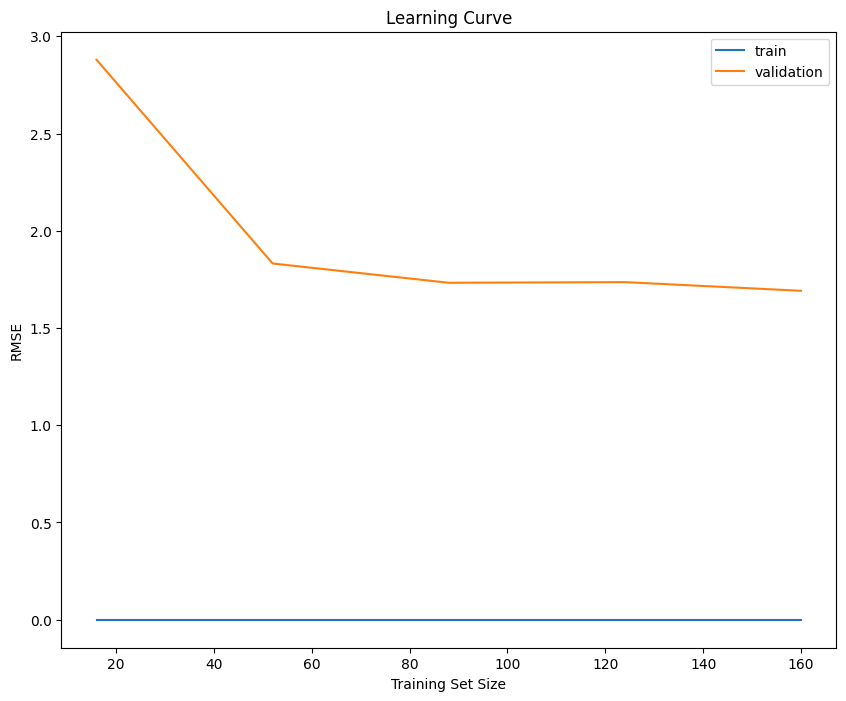

In [92]:
evaluation(decision_tree,features_prepared,target,kfold)

#### Forêts aléatoires (Random Forest)

RMSE moyen obtenu : 1.160934031825508
MAPE moyen obtenu : 8.30038782498998%


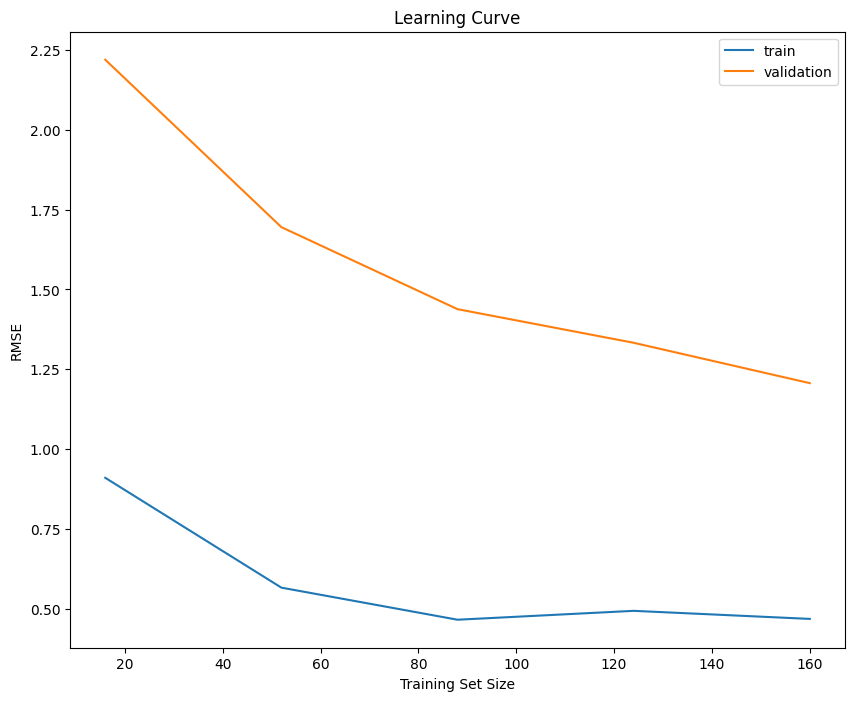

In [93]:
evaluation(random_for,features_prepared,target,kfold)

### 3) Tuning du modèle

In [51]:
randomforest_grid = {'n_estimators':[10,50,100,125,150,175,200],
                     'min_samples_split':range(2,10)
                    }

def get_best_parameters(search_type,modele,params_grid:dict):
    '''
    Fonction permettant de récupérer les meilleurs paramètres d'un modèle à partir d'une "grille" de paramètre.
    input: 
    - searchType : GridSearch ou RandomSearch
    - modele : le modèle à utiliser (random forest, decision tree, regression linéaire...)
    - params_grid : la grille de paramètre à tester
    output:
    - les paramètres ayant donnés les meilleurs résultats
    '''
    my_bestparam_search = search_type(modele,params_grid,scoring='neg_root_mean_squared_error')
    my_bestparam_search.fit(features_prepared, target)
    print("Les meilleurs hyper paramètres du modèle sont : " + str(my_bestparam_search.best_params_))
    return my_bestparam_search.best_params_

In [80]:
get_best_parameters(RandomizedSearchCV,random_for,randomforest_grid)

Les meilleurs hyper paramètres du modèle sont : {'n_estimators': 175, 'min_samples_split': 2}


{'n_estimators': 175, 'min_samples_split': 2}

In [81]:
best_random = RandomForestRegressor(n_estimators=175,min_samples_split=2)

RMSE moyen obtenu : 1.2428476799583255
MAPE moyen obtenu : 7.779107368738903%


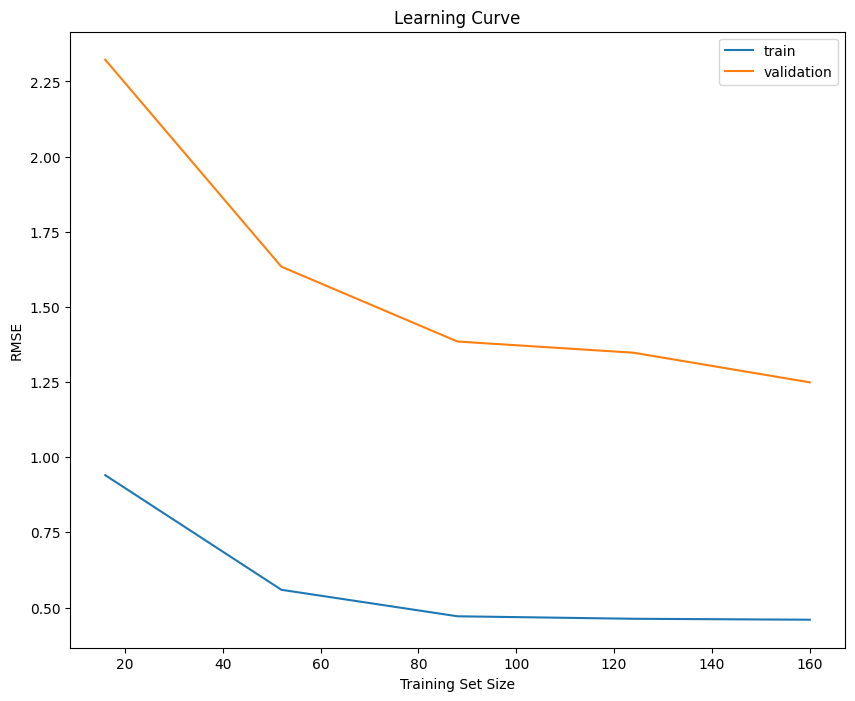

In [94]:
evaluation(best_random,features_prepared,target,kfold)

### Conclusion

Au vu du problème, l'utilisation des <b>fôrets aléatoires</b> semblent être la meilleure solution.
L'erreur moyenne sur la valeur "target" est de +- 1.24 ce qui est tout à fait acceptable, et un pourcentage d'erreur absolue de ~7.78%.